# 11章 バンディットアルゴリズムによる強化学習入門

## 11.2 確率分布の考え方

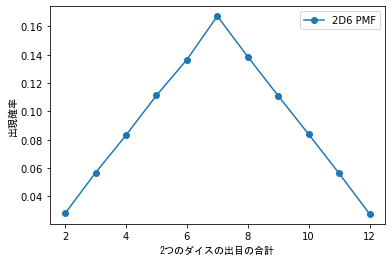

In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

n = 100000
dice_total = np.random.randint(1, 7, size=n)
dice_total += np.random.randint(1, 7, size=n)
x, y = np.unique(dice_total, return_counts=True)
y = y / n # カウント値を出現確率に変換
plt.plot(x, y, marker="o", label="2D6 PMF")
plt.legend()
plt.xlabel("2つのダイスの出目の合計", fontname="MS Gothic")
plt.ylabel("出現確率", fontname="MS Gothic")
plt.show()

[0.02796 0.08463 0.16779 0.27903 0.41552 0.58275 0.72136 0.8323  0.91612
 0.97236 1.     ]


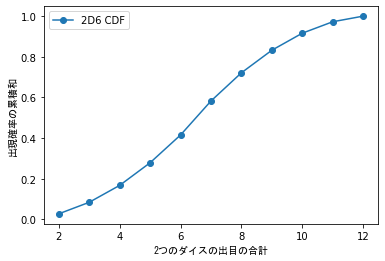

In [4]:
cumsum_y = np.cumsum(y)
print(cumsum_y)
plt.plot(x, cumsum_y, marker="o", label="2D6 CDF")
plt.legend()
plt.xlabel("2つのダイスの出目の合計", fontname="MS Gothic")
plt.ylabel("出現確率の累積和", fontname="MS Gothic")
plt.show()

## 11.3 事後分布の考え方

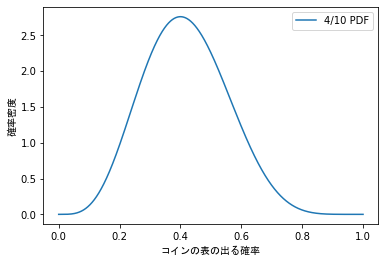

In [5]:
a = 4      # 表が出た回数
b = 10 - a # 裏が出た回数

x = np.linspace(0, 1, 10000)
plt.plot(x, scipy.stats.beta.pdf(x, a + 1, b + 1), label="4/10 PDF")
plt.legend()
plt.xlabel("コインの表の出る確率", fontname="MS Gothic")
plt.ylabel("確率密度", fontname="MS Gothic")
plt.show()

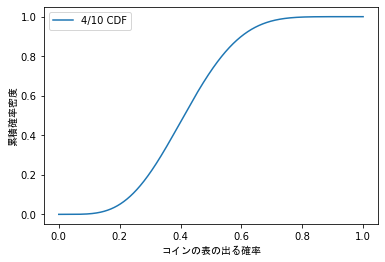

In [6]:
plt.plot(x, scipy.stats.beta.cdf(x, a + 1, b + 1), label="4/10 CDF")
plt.legend()
plt.xlabel("コインの表の出る確率", fontname="MS Gothic")
plt.ylabel("累積確率密度", fontname="MS Gothic")
plt.show()

In [7]:
print(" 5%", scipy.stats.beta.ppf(0.05, a + 1, b + 1))
print("95%", scipy.stats.beta.ppf(0.95, a + 1, b + 1))
print("90%信用区間", scipy.stats.beta.interval(0.9, a + 1, b + 1))

 5% 0.19957614988383673
95% 0.6501884654280826
90%信用区間 (0.1995761498838367, 0.6501884654280826)


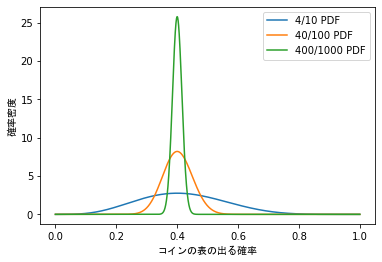

In [9]:
a1 = 4
b1 = 10 - a1
a2 = 40
b2 = 100 - a2
a3 = 400
b3 = 1000 - a3
x = np.linspace(0, 1, 10000)
plt.plot(x, scipy.stats.beta.pdf(x, a1 + 1, b1 + 1), label="4/10 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a2 + 1, b2 + 1), label="40/100 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a3 + 1, b3 + 1), label="400/1000 PDF")
plt.legend()
plt.xlabel("コインの表の出る確率", fontname="MS Gothic")
plt.ylabel("確率密度", fontname="MS Gothic")
plt.show()

In [11]:
print("90%信用区間(  4/  10)\t", scipy.stats.beta.interval(0.9, a1 + 1, b1 + 1))
print("90%信用区間( 40/ 100)\t", scipy.stats.beta.interval(0.9, a2 + 1, b2 + 1))
print("90%信用区間(400/1000)\t", scipy.stats.beta.interval(0.9, a3 + 1, b3 + 1))

90%信用区間(  4/  10)	 (0.1995761498838367, 0.6501884654280826)
90%信用区間( 40/ 100)	 (0.32355743256469754, 0.48256117185206715)
90%信用区間(400/1000)	 (0.37486561630199944, 0.42576020414058036)


[]

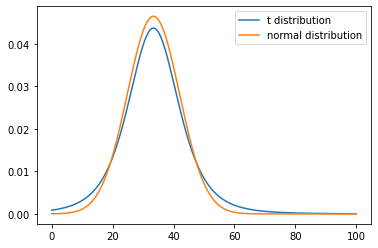

In [13]:
data = [32, 12, 20, 42, 61] # 標本
n = len(data) # サンプルサイズ
mean = np.mean(data) # 標本平均
se = np.std(data, ddof=1) / (n ** 0.5) #標準誤差
dof = n - 1 # 自由度

x = np.linspace(0, 100, 10000)
# サンプルサイズが30未満の場合、t分布を用いる
plt.plot(x, scipy.stats.t.pdf(x, loc=mean, scale=se, df=dof), label="t distribution")
# サンプルサイズが30以上の場合、正規分布を用いる
plt.plot(x, scipy.stats.norm.pdf(x, loc=mean, scale=se), label="normal distribution")
plt.legend()
plt.plot()

## 11.4 事後分布の信用区間上限を用いた実装例

Text(0, 0.5, '確率密度')

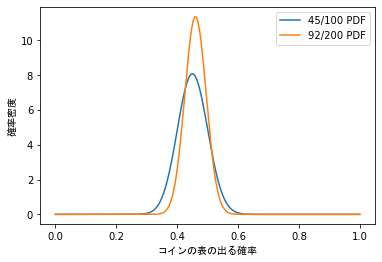

In [14]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2
x = np.linspace(0, 1, 10000)
plt.plot(x, scipy.stats.beta.pdf(x, a1 + 1, b1 + 1), label="45/100 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a2 + 1, b2 + 1), label="92/200 PDF")
plt.legend()
plt.xlabel("コインの表の出る確率", fontname="MS Gothic")
plt.ylabel("確率密度", fontname="MS Gothic")

In [16]:
print("CoinA:", scipy.stats.beta.ppf(0.95, a1 + 1, b1 + 1))
print("CoinB:", scipy.stats.beta.ppf(0.95, a2 + 1, b2 + 1))
np.argmax(scipy.stats.beta.ppf(0.95, [a1 + 1, a2 + 1], [b1 + 1, b2 + 1]))

CoinA: 0.5322261940040164
CoinB: 0.5181806676164464


0

## 11.5 UCB1

In [17]:
print("CoinA:", a1 / (a1 + b1) + (2 * np.log(a1 + b1 + a2 + b2) / (a1 + b1)) ** 0.5)
print("CoinB:", a2 / (a2 + b2) + (2 * np.log(a1 + b1 + a2 + b2) / (a2 + b2)) ** 0.5)

CoinA: 0.7877508689746393
CoinB: 0.6988259298036166


## 11.6 確率的なバンディットアルゴリズム
### 11.6.1 Softmax法

In [21]:
def softmax(x, t):
    return np.exp(x / t)/ np.sum(np.exp(x / t))

conversion_rate = np.array([0.12, 0.11, 0.10])
select_rate = softmax(conversion_rate, 0.01)
print(select_rate)
print(np.random.choice(len(select_rate), size=20, p=select_rate))
select_rate = softmax(conversion_rate, 100)
print(select_rate)

[0.66524096 0.24472847 0.09003057]
[0 1 1 2 1 0 1 0 2 0 0 0 0 1 0 0 0 2 0 0]
[0.33336667 0.33333333 0.3333    ]


### 11.6.2 Thompson Sampling法

[0.40813509 0.36190074 0.44251973]
[0.4449709  0.45149756 0.44556384]


(0.0, 8.613287455230221)

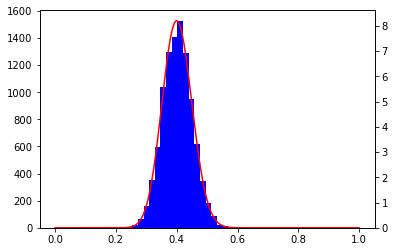

In [22]:
from matplotlib import cm

a = 40
b = 100 - a
print(scipy.stats.beta.rvs(a + 1, b + 1, size=3))
print(np.random.beta(a + 1, b + 1, size=3))

x = np.linspace(0, 1, 10000)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# beta分布から乱数を10000個生成して、ヒストグラムにして描画
ax1.hist(scipy.stats.beta.rvs(a + 1, b + 1, size=10000), bins=20, color="blue")

# beta分布の確率密度関数を描画する
ax2.plot(x, scipy.stats.beta.pdf(x, a + 1, b + 1), color="red")
ax2.set_ylim(0,)

In [24]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2
coin_a_dist = scipy.stats.beta.rvs(a1 + 1, b1 + 1, size=3)
coin_b_dist = scipy.stats.beta.rvs(a2 + 1, b2 + 1, size=3)
print("CoinA:", coin_a_dist)
print("CoinB:", coin_b_dist)
print("CoinA>CoinB", coin_a_dist > coin_b_dist)

n = 10000
thompson_sampling_score = np.random.beta([a1 + 1, a2 + 1], [b1 + 1, b2 + 1], size=(n, 2))
selected_arm = np.argmax(thompson_sampling_score, axis=1)
arm_choice_rate = np.bincount(selected_arm) / n
arm_choice_rate

CoinA: [0.40321595 0.50793596 0.38403154]
CoinB: [0.47639015 0.43074939 0.44637711]
CoinA>CoinB [False  True False]


array([0.4367, 0.5633])

## 11.7 各種バンディットアルゴリズムの比較

Random 0.109
Baysian_UCB 0.1167
UCB1 0.1113
Softmax 0.1119
Softmax_annealing 0.1154
Thompson_sampling 0.1165


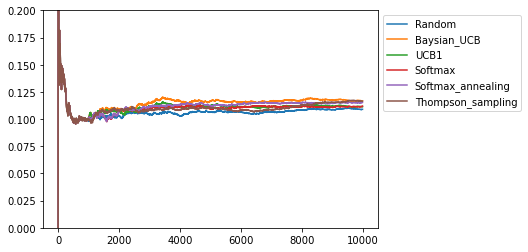

In [25]:
# 各種アルゴリズムの実装
def random_strategy(success_counts, fail_counts):
    return np.random.choice(len(success_counts))

def baysian_ucb_strategy(success_counts, fail_counts, q=0.95):
    score = scipy.stats.beta.ppf(q, success_counts + 1, fail_counts + 1)
    return np.argmax(score)

def ucb1_strategy(success_counts, fail_counts):
    mean = success_counts / (success_counts + fail_counts)
    ucb = (2.0 * np.log(np.sum(success_counts + fail_counts)) / (success_counts + fail_counts)) ** 0.5
    score = mean + ucb
    return np.argmax(score)

def softmax_strategy(success_counts, fail_counts, t=0.05):
    mean = success_counts / (success_counts + fail_counts)
    select_rate = np.exp(mean / t) / np.sum(np.exp(mean / t))
    return np.random.choice(len(select_rate), p=select_rate)

def softmax_annealing_strategy(success_counts, fail_counts, initial_t=0.1, k=100.0):
    mean = success_counts / (success_counts + fail_counts)
    t = initial_t / np.log(k * np.sum(success_counts + fail_counts) + 2)
    select_rate = np.exp(mean / t) / np.sum(np.exp(mean / t))
    return np.random.choice(len(select_rate), p=select_rate)

def thompson_sampling_strategy(success_counts, fail_counts):
    score = scipy.stats.beta.rvs(success_counts + 1, fail_counts + 1)
    return np.argmax(score)

actual_cvr = [0.12, 0.11, 0.10] # 実際のCVR
bandit_round = 10000 # 何回実験を行うか
random_seed = 1234567 # ランダムシード

strategy_list = [
    ("Random", random_strategy),
    ("Baysian_UCB", baysian_ucb_strategy),
    ("UCB1", ucb1_strategy),
    ("Softmax", softmax_strategy),
    ("Softmax_annealing", softmax_annealing_strategy),
    ("Thompson_sampling", thompson_sampling_strategy)
]

scores = []
arm0_select_rates = []

for name, select_arm_method in strategy_list:
    # random seedを初期化する
    # SciPyはNumPyの乱数を使っているので、SciPy側もこれで初期化できる
    np.random.seed(random_seed)

    success_counts = np.array([0.0, 0.0, 0.0])
    fail_counts = np.array([0.0, 0.0, 0.0])
    
    scores.append([])
    arm0_select_rates.append([])
    
    for i in range(bandit_round):
        if i < 1000: # 最初の1000ラウンドはランダムに配信する
            selected_arm = random_strategy(success_counts, fail_counts)
        else:
            selected_arm = select_arm_method(success_counts, fail_counts)

        # 選んだアームがコンバージョンしていたかどうかを判定
        if np.random.rand() < actual_cvr[selected_arm]:
            success_counts[selected_arm] += 1
        else:
            fail_counts[selected_arm] += 1
        
        # スコアの保存
        score = np.sum(success_counts) / np.sum(success_counts + fail_counts)
        scores[-1].append(score)
        
        # アーム0の選択確率の保存
        arm0_select_rate = (success_counts[0] + fail_counts[0]) / np.sum(success_counts + fail_counts)
        arm0_select_rates[-1].append(arm0_select_rate)

for i in range(len(strategy_list)):
    algorithm_name = strategy_list[i][0] 
    print(algorithm_name, scores[i][-1])
    plt.plot(scores[i], label=algorithm_name)
    plt.ylim(0.0, 0.2)

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()    

Random 0.3329
Baysian_UCB 0.9286
UCB1 0.5303
Softmax 0.4373
Softmax_annealing 0.6697
Thompson_sampling 0.7452


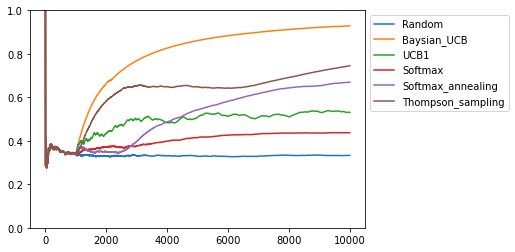

In [26]:
for i in range(len(strategy_list)):
    algorithm_name = strategy_list[i][0] 
    print(algorithm_name, arm0_select_rates[i][-1])
    plt.plot(arm0_select_rates[i], label=algorithm_name)
    plt.ylim(0, 1)

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

## 11.8 文脈付き多腕バンディットのブートストラップ法による実装

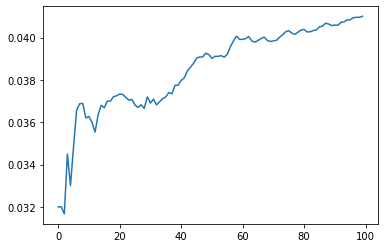

In [27]:
import sklearn.tree

class BootstrapTSContextualBandit:
    def __init__(self, regression_model_cls, param, arm_num=2, model_num=100, seed=None, bagging_rate=1.0):
        self.arm_num = arm_num
        self.model_num = model_num
        self.bagging_rate = bagging_rate
        self.seed = seed
        self.models = [
            [
                regression_model_cls(**param)
                for i in range(model_num)
            ]
            for j in range(self.arm_num)            
        ]
        self.is_initialized = False
            
    def fit(self, x, arm, y):
        np.random.seed(self.seed)

        for arm_id in range(self.arm_num):
            _x = x[arm == arm_id]
            _y = y[arm == arm_id]
            n_samples = len(_y)

            for i in range(self.model_num):
                # 利用する標本を乱数で決定する
                picked_sample = np.random.randint(0, n_samples, int(n_samples * self.bagging_rate)) 
                # 利用する標本を標本ウェイトに置き換える
                bootstrap_weight = np.bincount(picked_sample, minlength=n_samples)
                # 標本ウェイト付きで学習を行う
                self.models[arm_id][i].fit(_x, _y, sample_weight=bootstrap_weight)

        self.is_initialized = True

    def _predict_mean_sd(self, x, arm_id):
        # 各予測値の平均値と標準偏差値を求める
        predict_result = np.array([
            estimator.predict(x)
            for estimator in self.models[arm_id]
        ])

        mean = np.mean(predict_result, axis=0)
        sd = np.std(predict_result, axis=0)

        return mean, sd
    
    def _predict_thompson_sampling(self, x, arm_id):
        # 平均値と標準偏差から正規分布の乱数を生成して評価値とする
        mean, sd = self._predict_mean_sd(x, arm_id)
        return np.random.normal(mean, sd)
        
    def choice_arm(self, x):
        if self.is_initialized is False:
            return np.random.choice(self.arm_num, x.shape[0])

        # それぞれのアームごとに評価値を生成する
        score_list = np.zeros((x.shape[0], self.arm_num), dtype=np.float64)
        for arm_id in range(self.arm_num):
            score_list[:, arm_id] = self._predict_thompson_sampling(x, arm_id)
        # 評価値が最大のアームを返す
        return np.argmax(score_list, axis=1)

def generate_sample_data(sample_num=10000):
    weight = np.array([
        [0.05, 0.05, -0.05, 0.0, 0.0, 0.0, 0.0],
        [-0.05, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0],
        [0.05, -0.05, 0.05, 0.0, 0.0, 0.0, 0.0],
    ])

    arm_num, feature_num = weight.shape
    feature_vector = np.random.rand(sample_num, feature_num)

    theta = np.zeros((sample_num, arm_num))
    for i in range(arm_num):
        theta[:,i] = np.sum(feature_vector * weight[i], axis = 1)
        
    is_cv = (theta > np.random.rand(sample_num, arm_num)).astype(np.int8)

    return feature_vector, is_cv

loop_num = 100
batch_size = 1000

base_model = sklearn.tree.DecisionTreeRegressor
param = {
        'max_depth': 6,
        'min_samples_split': 10
}

model = BootstrapTSContextualBandit(base_model, param, arm_num = 3)

x_history = np.zeros((0, 7))
y_history = np.zeros(0)
arm_history = np.zeros(0)
scores = []

for i in range(loop_num):
    x, is_cv = generate_sample_data(batch_size)

    choiced_arm = model.choice_arm(x)
    y = is_cv[range(batch_size), choiced_arm]
   
    x_history = np.vstack((x_history, x))
    y_history = np.append(y_history, y)
    arm_history = np.append(arm_history, choiced_arm)
    
    model.fit(x_history, arm_history, y_history)
    
    score = np.sum(y_history) / y_history.shape[0]
    scores.append(score)

plt.plot(scores)